# In this notebook we will evaluate our portfolio's makeup

### Installation of libraries (consider conda install for working env first)

In [ ]:
# !pip install altair
# !pip install pandas_ta
# !pip install requests_html
# !pip install requests
# pip install scikit-plot
# !pip install --user tensorflow
# pip install --upgrade pip
# !pip install yahoo_fin --upgrade --no-cache-dir
# !pip install yfinance --upgrade --no-cache-dir
# !pip install --user pycaret
# pip install scikit-learn==0.23.2
# pip install benzinga
# !pip install --user yahooquery
# !pip install pycaret
# !pip install mplfinance
# !pip install requests_cache
# !pip install certifi
# !pip install polygon-api-client~=1.0.0b
# !pip install --upgrade yfinance
# !pip install yfinance==0.2.24
# !pip install yahoofinancials
# !pip install altair_saver
# !pip install vl-convert-python
# !pip install -U altair_viewer
# !pip install altair_viewer==4.17.0
# !pip install pdfkit

### Importing relevant libraries

In [30]:
from polygon import RESTClient
import getpass
from datetime import date
 
# Returns the current local date
today = date.today()
dateOfMonth = today.day
monthNumber = today.month
yearNumber = today.year

import ftplib
import io
import pandas as pd
import pandas_ta as ta
import requests
import requests_html
import numpy as np
import importlib

# from pycaret.classification import *
# from pycaret.regression import *

import yfinance as yf
importlib.reload(yf)
from yahoo_fin.stock_info import get_data, get_top_crypto, get_analysts_info
import yahoo_fin.stock_info as si
importlib.reload(si)
import yahoo_fin.options as ops
from yahoo_fin.stock_info import *

# Dow: tickers_dow()
# Nasdaq: tickers_nasdaq()
# S&P500: tickers_sp500()
# Others: tickers_other()

# import tensorflow as tf
import altair as alt

# from benzinga import financial_data
# from benzinga import news_data

import mplfinance as mpf

import requests_cache

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 

import metricFxns
from metricFxns import *
import vizFxns
from vizFxns import *

from sklearn import metrics
from sklearn import datasets

from yahooquery import Ticker

import ssl
import certifi
import urllib

from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

from yahoo_fin import stock_info as si

# Assuming df is your DataFrame
pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

# Define custom theme as a dictionary
my_custom_theme = {
    'config': {
        'axis': {
            'labelFont': 'Playfair Display',
            'titleFont': 'Playfair Display',
            'labelFontSize': 12,  # Adjust font size as needed
            'titleFontSize': 14  # Adjust font size as needed
        },
        'text': {
            'align': 'left',  # Align text to the left
            'font': 'Playfair Display',
            'fontSize': 12  # Adjust font size as needed
        },
        'grid': {
            'color': 'lightgray',  # Lighter vertical gridlines
            'strokeWidth': 0.5
        }
    }
}

# Register custom theme
alt.themes.register('my_custom_theme', my_custom_theme)
alt.themes.enable('my_custom_theme')

ThemeRegistry.enable('my_custom_theme')

In [2]:
currentDate = str(monthNumber) + "/" + str(dateOfMonth) + "/" + str(yearNumber)
yearPrior = str(monthNumber) + "/" + str(dateOfMonth+1) + "/" + str(yearNumber-1)
yearPrior

'5/26/2023'

In [3]:
roth = pd.read_csv("D:\Roth.csv")
indv = pd.read_csv("D:\Indv.csv")

roth.columns = list(roth.iloc[1].values)
roth = roth.iloc[2:]
roth = roth.iloc[:-1]

indv.columns = list(indv.iloc[1].values)
indv = indv.iloc[2:]
indv = indv.iloc[:-1]

indv['Market Value'] = indv['Market Value'].str.replace('$','').str.replace(',','').astype(float)
indv['% Of Account'] = indv['% Of Account'].str.replace('%','').astype(float)

roth['Market Value'] = roth['Market Value'].str.replace('$','').str.replace(',','').astype(float)
roth['% Of Account'] = roth['% Of Account'].str.replace('%','').astype(float)

# Define the new row to be added
new_row = {'Symbol': 'Cash & Cash Investments','Description': 'Cash and Money Market', 'Security Type': 'Cash and Money Market', 'Market Value': 25000}
 
# Use the loc method to add the new row to the DataFrame
indv.loc[len(indv)] = new_row

selected_account = indv

#cash or no cash included
# display(selected_account)
# selected_account = selected_account[selected_account['Symbol']!='Cash & Cash Investments']
selected_account = selected_account[selected_account['Security Type']!='Cash and Money Market']

totalValue = selected_account['Market Value'].sum()

selected_account['% Of Account'] = selected_account['Market Value']/totalValue

# indv

C:\Users\npess\AppData\Local\Temp/ipykernel_10000/3145164953.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  indv['Market Value'] = indv['Market Value'].str.replace('$','').str.replace(',','').astype(float)
C:\Users\npess\AppData\Local\Temp/ipykernel_10000/3145164953.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  roth['Market Value'] = roth['Market Value'].str.replace('$','').str.replace(',','').astype(float)
C:\Users\npess\AppData\Local\Temp/ipykernel_10000/3145164953.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [4]:
selected_account = selected_account[['Symbol','% Of Account','Security Type']]

selected_account = selected_account.groupby(['Symbol','Security Type']).sum().reset_index()
selected_account

,Symbol,Security Type,% Of Account
0,A,Equity,0.005378
1,ADBE,Equity,0.050982
2,ADSK,Equity,0.023014
3,AEP,Equity,0.003176
4,ALB,Equity,0.004555
...,...,...,...
60,V,Equity,0.009799
61,VEEV,Equity,0.007279
62,WMT,Equity,0.011670
63,XOM,Equity,0.008098


In [5]:
sector_etfs = ['XLE','XLV','XLU','XLI','GDX','XLK','XLY','XLB','XOP','XHB','XME','XTL']
current_portfolio = list(selected_account['Symbol'].values)

otherTickers = si.tickers_other(include_company_data = True)
nasdaqTickers = si.tickers_nasdaq(include_company_data = True)
allStocks = pd.concat([otherTickers,nasdaqTickers])
stockMarketTickers = list(allStocks['ACT Symbol'].unique())
nasdaqTicks = list(nasdaqTickers['Symbol'].unique())
# nasdaqTicks

In [7]:
infoDfs = []
tickerLst = ['ADBE']

for stock in tickerLst:#,'AMD','INTC','META','AAPL','AMZN','GOOGL','MSFT','TSLA','KO','NVDA']:
    print(stock)
    try:
        stock = stock.replace('/','-')
    except:
        pass

    if stock == 'Cash & Cash Investments':
        pass
    else:
        ticker = yf.Ticker(stock.lower())
        # CF = ticker.cashflow
        FINS = ticker.financials
        # Reset the index and move it to a column called 'Field'
        FINS.reset_index(inplace=True)
        FINS.rename(columns={'index': 'Field'}, inplace=True)
        FINS.columns = ['Field','2024','2023','2022','2021','2020']
        FINS['1 Year Change'] = FINS['2024']-FINS['2023']
        FINS['3 Year Change'] = FINS['2024']-FINS['2021']
        #Revenue Growth Rate etc.
        FINS.fillna(0,inplace=True)
        FINS['1 Year Change Rate'] = FINS['1 Year Change']/FINS['2023']*100
        FINS['3 Year Change Rate'] = FINS['3 Year Change']/FINS['2021']*100
        #Profit margin

        print(FINS.columns)
        display(FINS)
        # BS = ticker.balancesheet
        # DIV = ticker.dividends
        infoDf = pd.DataFrame.from_dict(ticker.info, orient='index').T
        display(infoDf)
        # infoDfs.append(infoDf)

# infoDf = pd.concat(infoDfs)
# infoDf.head()


ADBE
Index(['Field', '2024', '2023', '2022', '2021', '2020', '1 Year Change',
       '3 Year Change', '1 Year Change Rate', '3 Year Change Rate'],
      dtype='object')


,Field,2024,2023,2022,2021,2020,1 Year Change,3 Year Change,1 Year Change Rate,3 Year Change Rate
0,Tax Effect Of Unusual Items,-1.600000e+06,-8.400000e+06,-1.500000e+05,2.970000e+06,0.0,6.800000e+06,-4.570000e+06,-80.952381,-153.872054
1,Tax Rate For Calcs,2.000000e-01,2.100000e-01,1.500000e-01,2.700000e-01,0.0,-1.000000e-02,-7.000000e-02,-4.761905,-25.925926
2,Normalized EBITDA,7.792000e+09,7.016000e+09,6.607000e+09,5.038000e+09,0.0,7.760000e+08,2.754000e+09,11.060433,54.664549
3,Total Unusual Items,-8.000000e+06,-4.000000e+07,-1.000000e+06,1.100000e+07,0.0,3.200000e+07,-1.900000e+07,-80.000000,-172.727273
4,Total Unusual Items Excluding Goodwill,-8.000000e+06,-4.000000e+07,-1.000000e+06,1.100000e+07,0.0,3.200000e+07,-1.900000e+07,-80.000000,-172.727273
5,Net Income From Continuing Operation Net Minor...,5.428000e+09,4.756000e+09,4.822000e+09,5.260000e+09,0.0,6.720000e+08,1.680000e+08,14.129521,3.193916
6,Reconciled Depreciation,8.720000e+08,8.560000e+08,7.880000e+08,7.570000e+08,0.0,1.600000e+07,1.150000e+08,1.869159,15.191546
7,Reconciled Cost Of Revenue,1.650000e+09,1.478000e+09,1.249000e+09,1.127000e+09,0.0,1.720000e+08,5.230000e+08,11.637348,46.406389
8,EBITDA,7.784000e+09,6.976000e+09,6.606000e+09,5.049000e+09,0.0,8.080000e+08,2.735000e+09,11.582569,54.169142
9,EBIT,6.912000e+09,6.120000e+09,5.818000e+09,4.292000e+09,0.0,7.920000e+08,2.620000e+09,12.941176,61.043802


,address1,city,state,zip,country,phone,fax,website,industry,industryKey,...,returnOnEquity,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio
0,345 Park Avenue,San Jose,CA,95110-2704,United States,408 536 6000,408 537 6000,https://www.adobe.com,Software - Infrastructure,software-infrastructure,...,0.32367,6730375168,6783000064,-0.498,0.113,0.88082,0.38067,0.368,USD,1.7638


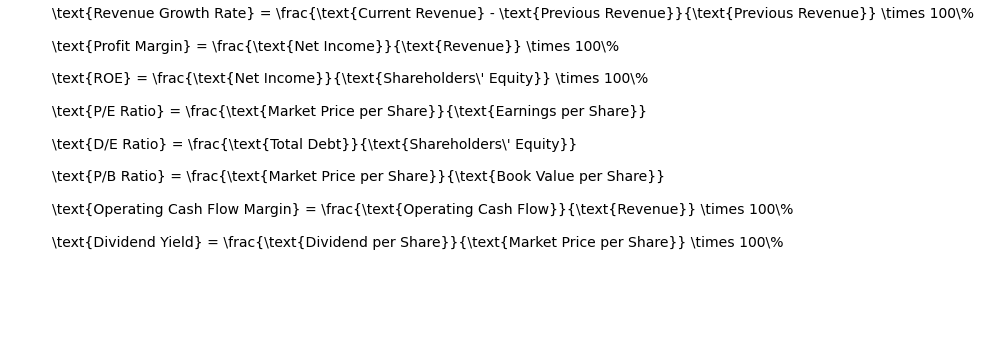

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

# LaTeX equations
equations = [
    r'\text{Revenue Growth Rate} = \frac{\text{Current Revenue} - \text{Previous Revenue}}{\text{Previous Revenue}} \times 100\%',
    r'\text{Profit Margin} = \frac{\text{Net Income}}{\text{Revenue}} \times 100\%',
    r'\text{ROE} = \frac{\text{Net Income}}{\text{Shareholders\' Equity}} \times 100\%',
    r'\text{P/E Ratio} = \frac{\text{Market Price per Share}}{\text{Earnings per Share}}',
    r'\text{D/E Ratio} = \frac{\text{Total Debt}}{\text{Shareholders\' Equity}}',
    r'\text{P/B Ratio} = \frac{\text{Market Price per Share}}{\text{Book Value per Share}}',
    r'\text{Operating Cash Flow Margin} = \frac{\text{Operating Cash Flow}}{\text{Revenue}} \times 100\%',
    r'\text{Dividend Yield} = \frac{\text{Dividend per Share}}{\text{Market Price per Share}} \times 100\%'
]
# Plot equations
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')
for i, eq in enumerate(equations):
    ax.text(0.1, 1-0.1*i, eq, fontsize=14, va='top')

# Specify the directory path
directory = "C:/Financial Outputs/Overviews"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Specify the path and filename for the PNG image
png_file = os.path.join(directory, "equations.png")

# Save the figure as a PNG file
plt.savefig(png_file, bbox_inches='tight', dpi=300)
plt.show()


